# Run this code before you start

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
plt.style.use('ggplot')

Write your answers here by modifying this jupyter notebook, writing code, your answers, etc. Add cells wherever you want...just as though it were a homework. You are also free to write answers on paper and turn them in, although that would really only make sense for question 1.

# 1. Utility (20pt)

You have the utility function
$$
u(x,z) = z - \alpha \beta e^{-x/\beta},
$$
where $z$ is the numeraire good with a price of $1.

Derive the demand and inverse demand functions for the good. Let $y$ be the consumer's disposable income and $p$ be the price.

### solution
$$
x(p) = \beta \ln(\alpha/p)
$$
$$
p(x) = \alpha e^{-x/\beta}
$$

# 2 Profit-maximization (25 pts)

You are consulting with a rail line who are evaluating 10 projects. The demand function for each route is
$$
Q(p) = a e^{-bp},
$$
where $a$ and $b$ vary by route. The routes also have differing marginal and fixed costs. The total cost for a route is $$\text{total cost} = Q \times \text{marginal cost} + \text{fixed cost}.$$

Run the code below to get a DataFrame which contains the $a,b$, marginal cost and fixed cost for each route. 

In [7]:
from numpy import random
from scipy.stats import beta
random.seed(20) #this ensures that your dataframe and mine will be the same even though they are randomly generated
N= 10
rv = beta(2,2)
df = pd.DataFrame({'a': 5 + 3*rv.rvs(N),'b': .5 +rv.rvs(N)/2,'marginal_cost': .1 +rv.rvs(N)/3,'fixed_cost': 1+rv.rvs(N)*3})
df.index.rename('route_id',inplace=True)
df

,a,b,marginal_cost,fixed_cost
route_id,,,,
0,6.845224,0.891829,0.223662,2.586870
1,7.864570,0.590171,0.275613,1.443790
2,7.463900,0.679448,0.214095,2.772142
3,6.970670,0.990595,0.172071,3.437737
4,5.599369,0.704056,0.355745,2.496507
5,6.811178,0.666130,0.264091,3.818397
6,6.406284,0.782917,0.168269,1.778970
7,5.749816,0.926586,0.176636,2.447017
8,6.670624,0.937403,0.241171,2.195415


Use the `df.apply` and `opt.minimize_scalar` functions to calculate the optimal price to charge for each market. Add these solutions as columns named `p*` and `profit` to the DataFrame `df` and print out `df`.

### answer 

In [8]:
def profit(p,row):
    Q = row.a*np.exp(-row.b*p)
    return Q*(p-row.marginal_cost) - row.fixed_cost

def f(row):
    res= opt.minimize_scalar(lambda p: -profit(p,row))
    return [res.x,-res.fun]
df[['p*','profit']] = df.apply(f,result_type='expand',axis=1)
df

,a,b,marginal_cost,fixed_cost,p*,profit
route_id,,,,,,
0,6.845224,0.891829,0.223662,2.586870,1.344953,-0.273828
1,7.864570,0.590171,0.275613,1.443790,1.970037,2.722607
2,7.463900,0.679448,0.214095,2.772142,1.685879,0.721996
3,6.970670,0.990595,0.172071,3.437737,1.181565,-1.254719
4,5.599369,0.704056,0.355745,2.496507,1.776087,-0.218986
5,6.811178,0.666130,0.264091,3.818397,1.765298,-0.663625
6,6.406284,0.782917,0.168269,1.778970,1.445543,0.859679
7,5.749816,0.926586,0.176636,2.447017,1.255866,-0.508840
8,6.670624,0.937403,0.241171,2.195415,1.307947,-0.107260


# 3 Travel pass (25pts)

Suppose that a consumer has an indirect utility function given by
$$
v(p,m) = m + \gamma \theta e^{-p/\theta}
$$
where $m$ is their disposble income, $p$ is the price of a subway ride and $\theta$ is a taste parameter reflecting the intensity of desire for subway rides.

The consumer has a "raw" income of $y$. The price of an unlimited ride pass is $T$.

For the following problem, run the code below to store the parameters.

In [4]:
p = .6
T = 5
y = 20
γ= 12

For what value of $\theta$ is the consumer indifferent between buying a pass an not buying one? 

**Hint**: Use the `opt.root_scalar` function. To come up with a guess `x0` and a `bracket` for `opt.root_scalar` to search, let $v_1(\theta)$ give the utility of someone with taste parameter $\theta$ who *does not* buy a pass, and $v_0(\theta)$ the utility of someone who *does* buy a pass. Then plot $v_1(\theta) - v_2(\theta)$

In [5]:
v = lambda p,m,θ: m + γ*θ*np.exp(-p/θ)
opt.root_scalar(lambda θ: v(p,y,θ) - v(0,y-T,θ),bracket=[.1,2])

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 0.7695346362512414

# 4 Logit

You're running a busline between two places. There are two groups: students and workers. The population of workers is $N_{\text{worker}}$ and that of students is $N_{\text{student}}$.

The utility of students is

$$
V_{\text{bus}}^s = \alpha_{\text{bus}}^s + \beta_{T,\text{bus}}^s T_{\text{bus}} + \beta_M^s M_{\text{bus}} \quad \quad \text{(bus)}
$$

$$
V_{\text{car}}^s = \beta_{T,\text{car}}^s T_{\text{car}} + \beta_M^s M_{\text{car}} \quad \quad \text{(car)}.
$$

for workers it is 

$$
V_{\text{bus}}^w = \alpha_{\text{bus}}^w + \beta_{T,\text{bus}}^w T_{\text{bus}} + \beta_M^w M_{\text{bus}} \quad \quad \text{(bus)}
$$

$$
V_{\text{car}}^w = \beta_{T,\text{car}}^w T_{\text{car}} + \beta_M^w M_{\text{car}} \quad \quad \text{(car)},
$$


So we see that, for both groups, the coefficient of time spent on the bus is different than time spent in car. The particular values of the above parameters are written below in python code. 

In [16]:
#student parameters
βTCarStudent = -3
βTBusStudent = -4
βMStudent = -2
αBusStudent = -1
NStudent= 1000

#worker parameters
βTCarWorker = -3
βTBusWorker = -5
βMWorker = -1
αBusWorker = -.5
NWorker=1500

The defined attributes of bus and car are as follows. 

In [17]:
TCar = .5
TBus = 1
MCar = 4

### 4 (a) (15pts)

Below, **plot the *direct* demand curves for Bus for each group, and for both groups together.** That is, I want a single plot with $M_b$ on the horizontal axis, rides on the vertical axis and three curves. Make the curves called `QBusWorker`, `QBusStudent`, `QTotal.` Make them, respectively, red, green, and blue. Include a legend.

Below I have gotten you started with three functions. Feel free to add to this code how you will, or not use it at all.

Text(0, 0.5, 'Q')

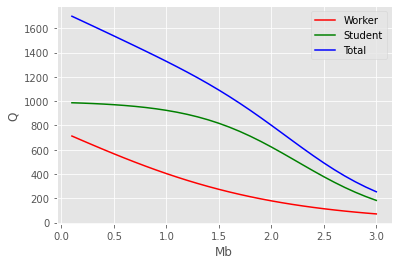

In [18]:
def QBusStudent(Mb):
    Vbus = αBusStudent + βTBusStudent*TBus + βMStudent*Mb
    Vcar = βTCarStudent*TCar + βMStudent*MCar
    return NStudent*np.exp(Vbus)/(np.exp(Vbus)+np.exp(Vcar))

def QBusWorker(Mb):
    Vbus = αBusWorker + βTBusWorker*TBus + βMWorker*Mb
    Vcar = βTCarWorker*TCar + βMWorker*MCar
    return NWorker*np.exp(Vbus)/(np.exp(Vbus)+np.exp(Vcar))

def QTotal(Mb):
    return QBusStudent(Mb) + QBusWorker(Mb)

Mbs = np.linspace(.1,3,30)
Qs = QTotal(Mbs)
plt.plot(Mbs,QBusWorker(Mbs),color='red',label='Worker')
plt.plot(Mbs,QBusStudent(Mbs),color='green',label='Student')
plt.plot(Mbs,QTotal(Mbs),color='blue',label='Total')
plt.legend()
plt.xlabel("Mb")
plt.ylabel("Q")

### 4 (b) (15pts)
Choose the price, $M_b^*$, that maximizes total ridership subject to a break-even constraint. Use `opt.minimize`.

In [19]:
TC = 1000
def fun(Mb):
    return Mb*QTotal(Mb) - TC

constraints = {
    'type':'ineq',
    'fun':fun
}


opt.minimize(lambda Mbs: -QTotal(Mbs),x0=1.5, constraints=constraints)

     fun: array([-1461.06887767])
     jac: array([414.4781189])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.68443043])